Dataset yang digunakan adalah review aplikasi TikTok dari Google Play Store

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv('tiktok.csv')
display(data.head(10))
print(data.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tkwt.bda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN
5,gp:AOqpTOGacb4U8fdVlRrwfGQgPVcUR_kMA2Tm97nvKzP...,Laura Gigaud,https://play-lh.googleusercontent.com/a/AATXAJ...,I love This app u can even make good friend an...,5,0,23.9.5,2022-04-05 23:16:34,NaN,NaN
6,gp:AOqpTOEsoIfvi94iZEXIXnCP0YXKpB5q0hmJxaht3z3...,Adil Adil,https://play-lh.googleusercontent.com/a/AATXAJ...,Pleas for you my video and like All,5,0,23.8.4,2022-04-05 23:15:46,NaN,NaN
7,gp:AOqpTOFCN3EL7GMDZVfnTtDd2ASdHEkLIc9afGYqFqH...,kennyongefuel,https://play-lh.googleusercontent.com/a-/AOh14...,They suspended my phine for no reason tiktok u...,1,0,23.9.5,2022-04-05 23:15:37,NaN,NaN
8,gp:AOqpTOFqNTlxGXuxlj26IY2BMkK7nekpro4t-EVz6bw...,Rolen Helin,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,NaN,2022-04-05 23:15:35,NaN,NaN
9,gp:AOqpTOGcJsoe5_f-B845gKT6anTyzT8bMKOCaecyMHm...,isaac kamau,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,NaN,2022-04-05 23:14:52,NaN,NaN


(307057, 10)


Dari data di atas kita bisa melihat terdapat nilai NaN di beberapa kolom. Untuk menganalisa review TikTok kita hanya membutuhkan 2 kolom saja yaitu kolom <b>content</b> dan kolom <b>score</b>

In [22]:
data = data[['content','score']]
data.head(10)

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
5,I love This app u can even make good friend an...,5
6,Pleas for you my video and like All,5
7,They suspended my phine for no reason tiktok u...,1
8,Good,5
9,Good,5


Sekarang kita akan cek apakah diantara kedua kolom tersebut terdapat *missing value*

In [23]:
data.isna().sum()

content    4
score      0
dtype: int64

Terdapat 4 data yang missing pada kolom content dan kita akan drop data tersebut

In [24]:
data = data.dropna()

Sekarang kita akan menyiapkan data untuk dilakukan sentiment analysis. Kita harus melakukan cleansing text pada kolom content

In [25]:
stopword = set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('https?://\S+|www\.\S+','', text)
    text = re.sub('<.*?>+','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n','', text)
    text = re.sub('\w*\d\w*','', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data['content'] = data['content'].apply(clean)

Sekarang kita akan melihat persentase rating TikTok yang diberikan di Google Play Store

In [27]:
ratings = data['score'].value_counts()
number = ratings.index
quantity = ratings.values
import plotly.express as px
fig = px.pie(data,
               values = quantity,
               names = number,
               hole = 0.5)
fig.show()

Dari pie chart di atas kita dapat melihat 75,7% pengguna memberikan 5 bintang untuk TikTok dan terdapat 12,1% pengguna yang memberikan bintang 1

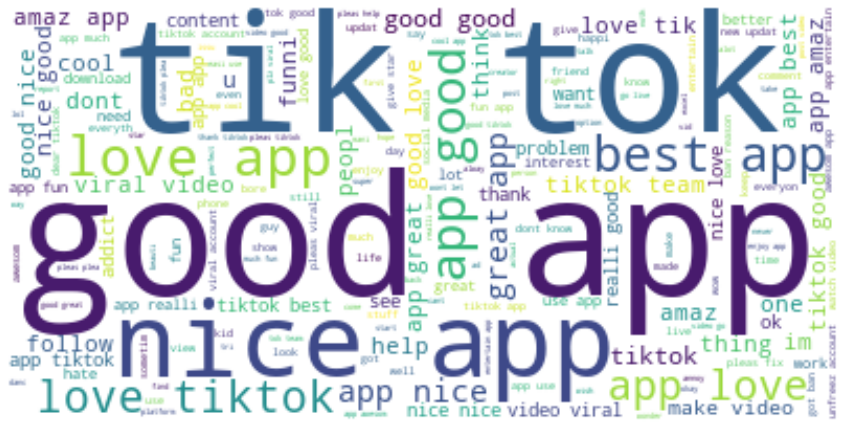

In [31]:
text =" ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sekarang kita akan menambah kolom Positive, Negative, dan Neutral pada dataset dengan mengkalkulasi sentiment score dari review

In [32]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data['content']]
data['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data['content']]
data = data[['content','Positive','Negative','Neutral']]
data.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tkwt.bda\AppData\Roaming\nltk_data...


,content,Positive,Negative,Neutral
0,good,1.000,0.000,0.000
1,awesom app mani peopl easier fb girl awesom gu...,0.381,0.000,0.619
2,bad,0.000,1.000,0.000
3,good,1.000,0.000,0.000
4,interest app,0.750,0.000,0.250
5,love app u even make good friend cool video ☺️,0.716,0.000,0.284
6,plea video like,0.556,0.000,0.444
7,suspend phine reason tiktok u got fix messdd uo,0.000,0.247,0.753
8,good,1.000,0.000,0.000
9,good,1.000,0.000,0.000


Sekarang kita akan melihat kata yang sering digunakan pada positive review TikTok

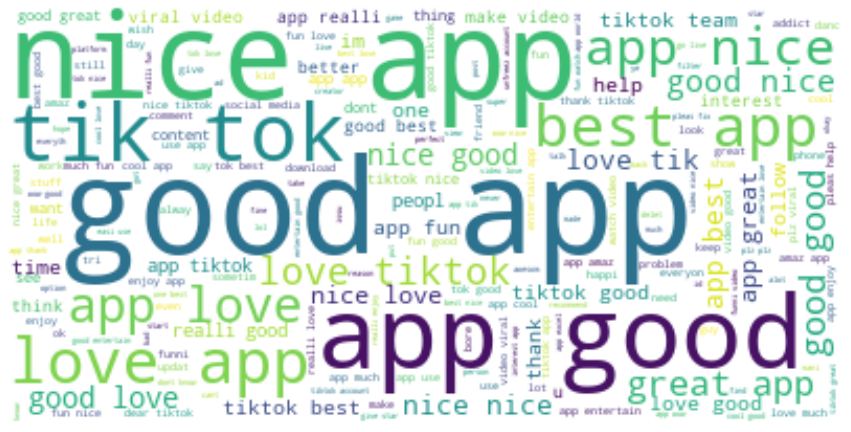

In [38]:
positive = ' '.join([i for i in data['content'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sekarang kita akan melihat kata yang sering digunakan pada negative review TikTok

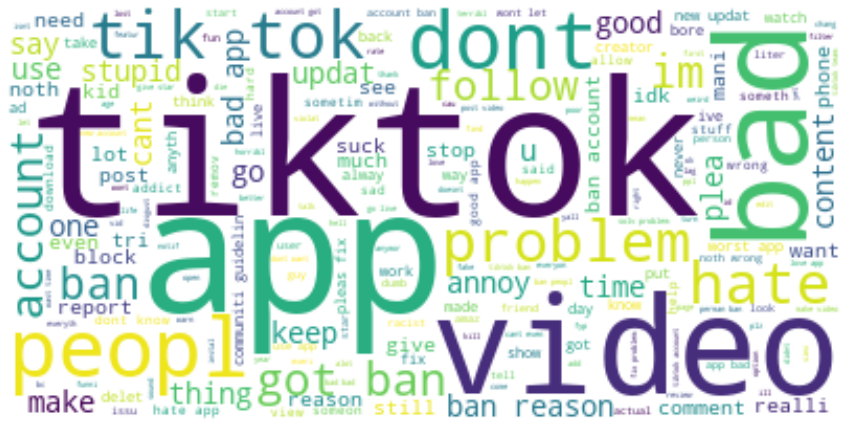

In [39]:
negative = ' '.join([i for i in data['content'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Kesimpulan

TikTok terkenal dengan shot video nya. Pengguna sering menggunakan aplikasi ini untuk menonton video yang lucu dan menghibur. Meskipun kontennya menghibur, beberapa orang tidak menyukai aplikasi ini